### Name : Shivanka Priyashan
### Index : 190476V

In [3]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

## Question 01

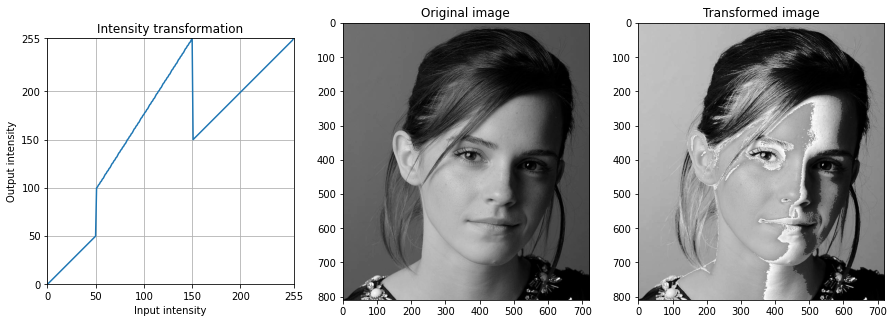

In [4]:
img  = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None 

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))

ax[0].plot(t)
ax[0].set_title("Intensity transformation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray')

ax[2].set_title("Transformed image")
ax[2].imshow(g,cmap='gray')

plt.show()

## Question 02

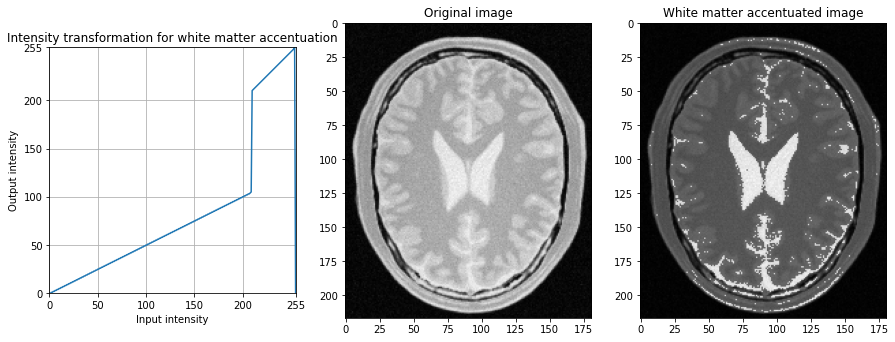

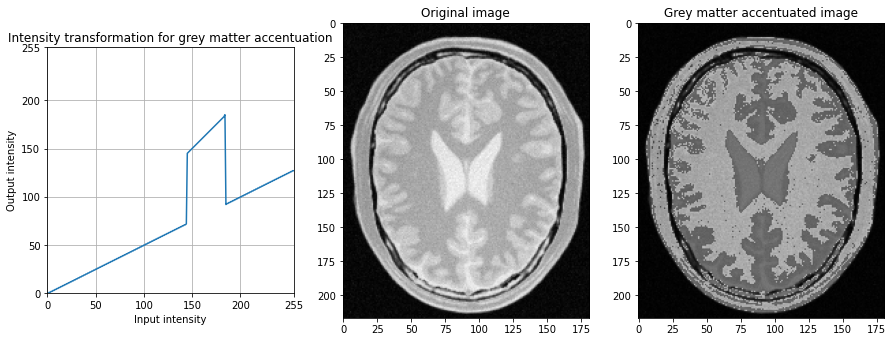

In [5]:
img = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None

#white matter
white_start = 210
white_end = 255

t1 = np.linspace(0,white_start/2,white_start)
t2 = np.linspace(white_start,white_end,white_end - white_start)
r = 256-(white_end)
t3 = np.linspace(0,0,r)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(t)
ax[0].set_title("Intensity transformation for white matter accentuation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray',vmin=0, vmax=255)

ax[2].set_title("White matter accentuated image")
ax[2].imshow(g,cmap='gray',vmin=0, vmax=255)

#grey matter
grey_start = 145
grey_end = 185

t1 = np.linspace(0,grey_start/2,grey_start)
t2 = np.linspace(grey_start,grey_end,grey_end - grey_start)
r = 256-(grey_end)
t3 = np.linspace(grey_end/2,255/2,r)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))

ax[0].plot(t)
ax[0].set_title("Intensity transformation for grey matter accentuation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray',vmin=0, vmax=255)

ax[2].set_title("Grey matter accentuated image")
ax[2].imshow(g,cmap='gray',vmin=0, vmax=255)

plt.show()


## Question 03

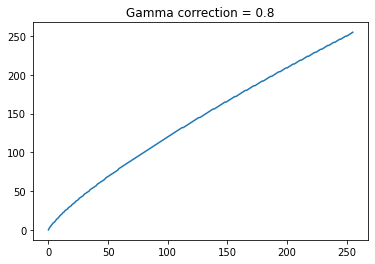

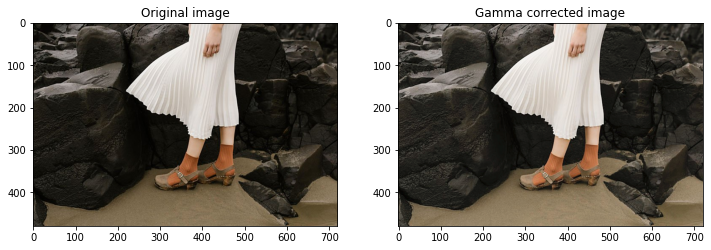

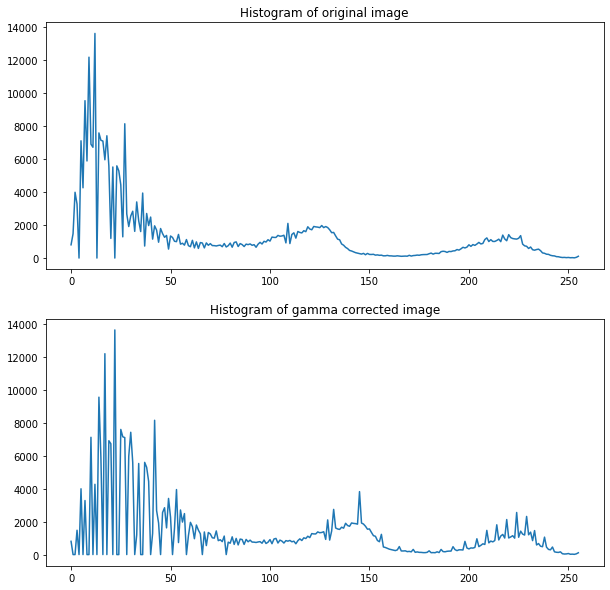

In [23]:
img = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_lab_original = cv.cvtColor(img,cv.COLOR_RGB2Lab)
(L,a,b) = cv.split(img_lab_original)
g_val = 0.8

t = np.array([(p/255)**g_val*255 for p in range(0,256)]).astype(np.uint8)
L_transformed = cv.LUT(L,t)

img_lab = cv.merge([L_transformed,a,b])
img_rgb = cv.cvtColor(img_lab,cv.COLOR_Lab2RGB)

fig, ax  = plt.subplots()
ax.plot(t)
ax.set_title("Gamma correction = 0.8")

fig, ax = plt.subplots(1,2,figsize=(12,12))

ax[0].imshow(img)
ax[0].set_title("Original image")

ax[1].imshow(img_rgb)
ax[1].set_title("Gamma corrected image")

hist_1 = cv.calcHist([L],[0],None,[256],[0,256])
hist_2 = cv.calcHist([L_transformed],[0],None,[256],[0,256])

fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(hist_1)
ax[0].set_title("Histogram of original image")

ax[1].plot(hist_2)
ax[1].set_title("Histogram of gamma corrected image")

plt.show()